# Processing raw text with NLKT

## Ebooks

In [3]:
from  urllib.request import urlopen

In [7]:
url = "http://www.gutenberg.org/files/2554/2554-0.txt"

In [11]:
raw = urlopen(url).read().decode("utf-8")

In [12]:
type(raw)

str

In [16]:
print(raw[:75])

﻿The Project Gutenberg EBook of Crime and Punishment, by Fyodor Dostoevsky


In [17]:
import nltk

In [20]:
tokens = nltk.word_tokenize(raw)

In [21]:
len(tokens)

257726

In [22]:
tokens[:10]

['\ufeffThe',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'Crime',
 'and',
 'Punishment',
 ',',
 'by']

In [23]:
text = nltk.Text(tokens)

In [24]:
type(text)

nltk.text.Text

In [26]:
print(text[1020:1060])

['I', 'CHAPTER', 'I', 'On', 'an', 'exceptionally', 'hot', 'evening', 'early', 'in', 'July', 'a', 'young', 'man', 'came', 'out', 'of', 'the', 'garret', 'in', 'which', 'he', 'lodged', 'in', 'S.', 'Place', 'and', 'walked', 'slowly', ',', 'as', 'though', 'in', 'hesitation', ',', 'towards', 'K.', 'bridge', '.', 'He']


In [27]:
text.collocations()

Katerina Ivanovna; Pyotr Petrovitch; Pulcheria Alexandrovna; Avdotya
Romanovna; Rodion Romanovitch; Marfa Petrovna; Sofya Semyonovna; old
woman; Project Gutenberg-tm; Porfiry Petrovitch; Amalia Ivanovna;
great deal; young man; Nikodim Fomitch; Ilya Petrovitch; Project
Gutenberg; Andrey Semyonovitch; Hay Market; Dmitri Prokofitch; Good
heavens


In [29]:
raw.find("PART I")

5336

In [33]:
raw.rfind("End of Project Gutenberg’s Crime")

1157810

In [34]:
raw = raw[5336:1157810]

## Dealing with HTML

In [49]:
from bs4 import BeautifulSoup

In [36]:
url = "http://news.bbc.co.uk/2/hi/health/2284781.stm"

In [39]:
html = urlopen(url).read().decode("utf-8")

In [41]:
html[:60]

'<!doctype html public "-//W3C//DTD HTML 4.0 Transitional//EN'

In [51]:
soup = BeautifulSoup(html, "html.parser")

In [52]:
raw = soup.getText()

In [87]:
tokens = nltk.word_tokenize(raw)

In [88]:
print(tokens[:10])

['BBC', 'NEWS', '|', 'Health', '|', 'Early', 'test', 'for', 'pregnancy', 'danger']


In [89]:
tokens = tokens[109:]

In [90]:
text = nltk.Text(tokens)

In [91]:
text.concordance("gene")

Displaying 3 of 3 matches:
 02 Apr 01 | Health Pregnancy danger gene identified 24 Oct 00 | Health Scient
er's Polio campaign launched in Iraq Gene defect explains high blood pressure 
er's Polio campaign launched in Iraq Gene defect explains high blood pressure 


## Processing RSS feeds

In [93]:
import feedparser

In [94]:
llog = feedparser.parse("http://languagelog.ldc.upenn.edu/nll/?feed=atom")

In [96]:
llog["feed"]["title"]

'Language Log'

In [98]:
post = llog.entries[2]

In [100]:
post.title

'Jawn'

In [101]:
content = post.content[0].value

In [104]:
content[:70]

'<blockquote class="twitter-tweet" data-width="500">\n<p lang="en" dir="'

In [103]:
soup_log = BeautifulSoup(content, "html.parser")

In [106]:
print(nltk.word_tokenize(soup_log.getText()))

['Philadelphia', ',', 'this', 'jawn', "'s", 'for', 'you', '.', 'https', ':', '//t.co/e9Ux87wkA4', '—', 'Merriam-Webster', '(', '@', 'MerriamWebster', ')', 'October', '4', ',', '2017', 'See', 'Ben', 'Zimmer', "'s", 'jawn', 'etymology', 'interview', ',', 'and', 'also', '``', 'Vaina', '==', 'Jawn', '?', '``', ',', '8/12/2016', '.']


## Reading Local Files

In [111]:
f = open("../sample-corpus/senseless.txt")

In [112]:
raw = f.read()

In [113]:
raw

'This is a sentence. Followed by another sentence. So much senseless sentences.'

In [123]:
with open("../sample-corpus/come-together.txt") as f:
    for line in f.readlines():
        print(line) if "come together" in line.lower() else None

Come together right now over me

Come together right now over me

Come together right now over me

Come together

Come together

Come together

Come together

Come together right now over me


## Capturing User Input

In [129]:
s = input("Enter some text")
print("You typed {} words".format(len(nltk.word_tokenize(s))))

Enter some textThis is a very interesting feature that Python offersa
You typed 9 words


## The NLTK Pipeline

**HTML** - urlopen + beautiful soup -> **ASCII** - wordpunct_tokenize + Text -> **TEXT** - lower + set -> **VOCAB**

In [145]:
raw = open("../sample-corpus/come-together.txt").read() ## TO ASCII
text = nltk.Text(nltk.word_tokenize(raw)) ## TO TEXT
vocab = text.vocab() ## TO VOCAB

## Text Processing with Unicode

In [147]:
path = nltk.find("corpora/unicode_samples/polish-lat2.txt")

In [149]:
import codecs

In [156]:
f = codecs.open(path, encoding="latin2")
for line in f:
    line = line.strip()
    print(line.encode("unicode_escape"))

b'Pruska Biblioteka Pa\\u0144stwowa. Jej dawne zbiory znane pod nazw\\u0105'
b'"Berlinka" to skarb kultury i sztuki niemieckiej. Przewiezione przez'
b'Niemc\\xf3w pod koniec II wojny \\u015bwiatowej na Dolny \\u015al\\u0105sk, zosta\\u0142y'
b'odnalezione po 1945 r. na terytorium Polski. Trafi\\u0142y do Biblioteki'
b'Jagiello\\u0144skiej w Krakowie, obejmuj\\u0105 ponad 500 tys. zabytkowych'
b'archiwali\\xf3w, m.in. manuskrypty Goethego, Mozarta, Beethovena, Bacha.'


In [157]:
ord("a")

97

In [158]:
a = u'\u0061'

In [160]:
a

'a'

In [161]:
print(a)

a


In [163]:
nacute = u'\u0144'

In [164]:
nacute

'ń'

In [165]:
nacute.encode("utf-8")

b'\xc5\x84'

## Regular Expressions

In [169]:
import re
wordlist = [w for w in nltk.corpus.words.words("en") if w.islower()]

In [174]:
[w for w in wordlist if re.search("ed$", w)][:10]

['abaissed',
 'abandoned',
 'abased',
 'abashed',
 'abatised',
 'abed',
 'aborted',
 'abridged',
 'abscessed',
 'absconded']

In [175]:
[w for w in wordlist if re.search("^..j..t..$", w)][:10]

['abjectly',
 'adjuster',
 'dejected',
 'dejectly',
 'injector',
 'majestic',
 'objectee',
 'objector',
 'rejecter',
 'rejector']

In [177]:
[w for w in wordlist if re.search("^[ghi][mno][jkl][def]$", w)]

['gold', 'golf', 'hold', 'hole']

In [178]:
chatwords = sorted(set(w for w in nltk.corpus.nps_chat.words()))

In [183]:
[w for w in chatwords if re.search("^m+i+n+e+$", w)]

['miiiiiiiiiiiiinnnnnnnnnnneeeeeeeeee',
 'miiiiiinnnnnnnnnneeeeeeee',
 'mine',
 'mmmmmmmmiiiiiiiiinnnnnnnnneeeeeeee']

In [188]:
[w for w in chatwords if re.search("^[ah]+$", w)]

['a',
 'aaaaaaaaaaaaaaaaa',
 'aaahhhh',
 'ah',
 'ahah',
 'ahahah',
 'ahh',
 'ahhahahaha',
 'ahhh',
 'ahhhh',
 'ahhhhhh',
 'ahhhhhhhhhhhhhh',
 'h',
 'ha',
 'haaa',
 'hah',
 'haha',
 'hahaaa',
 'hahah',
 'hahaha',
 'hahahaa',
 'hahahah',
 'hahahaha',
 'hahahahaaa',
 'hahahahahaha',
 'hahahahahahaha',
 'hahahahahahahahahahahahahahahaha',
 'hahahhahah',
 'hahhahahaha']

In [189]:
wsj = sorted(set(nltk.corpus.treebank.words()))

In [193]:
[w for w in wsj if re.search("[0-9]+\.[0-9]+$", w)][:15]

['0.0085',
 '0.05',
 '0.1',
 '0.16',
 '0.2',
 '0.25',
 '0.28',
 '0.3',
 '0.4',
 '0.5',
 '0.50',
 '0.54',
 '0.56',
 '0.60',
 '0.7']

In [196]:
[w for w in wsj if re.search("[A-Z]+\$$", w)]

['C$', 'US$']

In [200]:
[w for w in wsj if re.search("^[0-9]{4}$", w)][:10]

['1614',
 '1637',
 '1787',
 '1901',
 '1903',
 '1917',
 '1925',
 '1929',
 '1933',
 '1934']

In [202]:
[w for w in wsj if re.search("[0-9]+-[a-z]{3,5}$", w)]

['10-day',
 '10-lap',
 '10-year',
 '100-share',
 '12-point',
 '12-year',
 '14-hour',
 '15-day',
 '150-point',
 '190-point',
 '20-point',
 '20-stock',
 '21-month',
 '237-seat',
 '240-page',
 '27-year',
 '30-day',
 '30-point',
 '30-share',
 '30-year',
 '300-day',
 '36-day',
 '36-store',
 '42-year',
 '50-state',
 '500-stock',
 '52-week',
 '69-point',
 '84-month',
 '87-store',
 '90-day']

In [207]:
[w for w in wsj if re.search("[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}", w)][:10]

['black-and-white',
 'bread-and-butter',
 'father-in-law',
 'machine-gun-toting',
 'savings-and-loan',
 'search-and-seizure',
 'truth-in-lending']

In [209]:
[w for w in wsj if re.search("(ed|ing)$", w)][:10]

['62%-owned',
 'Absorbed',
 'According',
 'Adopting',
 'Advanced',
 'Advancing',
 'Alfred',
 'Allied',
 'Annualized',
 'Anything']

### word pieces

In [210]:
fd = nltk.FreqDist(
    vs for word in wsj
    for vs in re.findall(r"[aeiou]{2,}", word)
)

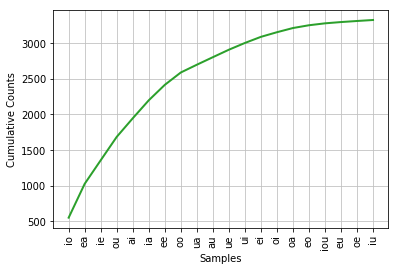

In [221]:
fd.plot(20, cumulative=True)

In [222]:
regexp = r"^[AEIOUaeiou]+|[AEIOIUaeiou]+$|[^AEIOUaeiou]"

In [225]:
def compress(word):
    pieces = re.findall(regexp, word)
    return "".join(pieces)

In [227]:
english_udhr = nltk.corpus.udhr.words("English-Latin1")

In [236]:
print(nltk.tokenwrap(compress(w) for w in english_udhr)[:200])

Unvrsl Dclrtn of Hmn Rghts Prmble Whrs rcgntn of the inhrnt dgnty and
of the eql and inlnble rghts of all mmbrs of the hmn fmly is the fndtn
of frdm , jstce and pce in the wrld , Whrs dsrgrd and cntmp


In [238]:
rotokas_words = nltk.corpus.toolbox.words("rotokas.dic")

In [240]:
cvs = [cv for w in rotokas_words for cv in re.findall(r"[ptksvr][aeiou]", w)]

In [242]:
cvs[:10]

['ka', 'ka', 'ka', 'ka', 'ka', 'ro', 'ka', 'ka', 'vi', 'ko']

In [244]:
cfd = nltk.ConditionalFreqDist(cvs)

In [245]:
cfd.tabulate()

    a   e   i   o   u 
k 418 148  94 420 173 
p  83  31 105  34  51 
r 187  63  84  89  79 
s   0   0 100   2   1 
t  47   8   0 148  37 
v  93  27 105  48  49 


In [249]:
cv_words = [(cv, w) for w in rotokas_words for cv in re.findall(r"[ptksvr][aeiou]", w)]

In [252]:
cv_index = nltk.Index(cv_words)

In [256]:
cv_index["so"]

['kaekaesoto', 'kekesopa']

### Searching Tokenized Text

In [257]:
from nltk.corpus import gutenberg, nps_chat

In [258]:
moby = nltk.Text(gutenberg.words("melville-moby_dick.txt"))

In [262]:
moby.findall(r"<a> (<.*>) <man>")

monied; nervous; dangerous; white; white; white; pious; queer; good;
mature; white; Cape; great; wise; wise; butterless; white; fiendish;
pale; furious; better; certain; complete; dismasted; younger; brave;
brave; brave; brave


In [263]:
chat = nltk.Text(nps_chat.words())

In [264]:
chat.findall(r"<.*> <.*> <bro>")

you rule bro; telling you bro; u twizted bro


In [266]:
chat.findall(r"<l.*>{3,}")

lol lol lol; lmao lol lol; lol lol lol; la la la la la; la la la; la
la la; lovely lol lol love; lol lol lol.; la la la; la la la


In [267]:
from nltk.corpus import brown

In [268]:
hobbies_learned = nltk.Text(brown.words(categories=["hobbies", "learned"]))

In [270]:
hobbies_learned.findall(r"<\w*> <and> <other> <\w*s>")

speed and other activities; water and other liquids; tomb and other
landmarks; Statues and other monuments; pearls and other jewels;
charts and other items; roads and other features; figures and other
objects; military and other areas; demands and other factors;
abstracts and other compilations; iron and other metals


In [274]:
hobbies_learned.findall(r"<as> <\w*> <as> <\w*>")

as accurately as possible; as well as the; as faithfully as possible;
as much as what; as neat as a; as simple as you; as well as other; as
well as other; as involved as determining; as well as other; as
important as another; as accurately as possible; as accurate as any;
as much as any; as different as a; as Orphic as that; as coppery as
Delawares; as good as another; as large as small; as well as ease; as
well as their; as well as possible; as straight as possible; as well
as nailed; as smoothly as the; as soon as a; as well as injuries; as
well as many; as well as reason; as well as in; as well as of; as well
as a; as well as summer; as well as providing; as important as
cooling; as evenly as it; as much as shading; as well as some; as well
as subsoil; as high as possible; as well as many; as general as
electrical; as long as the; as well as the; as much as was; as well as
set; as well as by; as high as 15; as well as aid; as much as
possible; as well as personalities; as low as a; 

## Normalizing Text

In [280]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government.  Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""
tokens = nltk.word_tokenize(raw)

In [284]:
print(tokens)

['DENNIS', ':', 'Listen', ',', 'strange', 'women', 'lying', 'in', 'ponds', 'distributing', 'swords', 'is', 'no', 'basis', 'for', 'a', 'system', 'of', 'government', '.', 'Supreme', 'executive', 'power', 'derives', 'from', 'a', 'mandate', 'from', 'the', 'masses', ',', 'not', 'from', 'some', 'farcical', 'aquatic', 'ceremony', '.']


### Stemmers

In [285]:
porter = nltk.PorterStemmer()

In [286]:
lancaster = nltk.LancasterStemmer()

In [288]:
print([porter.stem(w) for w in tokens])

['denni', ':', 'listen', ',', 'strang', 'women', 'lie', 'in', 'pond', 'distribut', 'sword', 'is', 'no', 'basi', 'for', 'a', 'system', 'of', 'govern', '.', 'suprem', 'execut', 'power', 'deriv', 'from', 'a', 'mandat', 'from', 'the', 'mass', ',', 'not', 'from', 'some', 'farcic', 'aquat', 'ceremoni', '.']


In [291]:
print([lancaster.stem(w) for w in tokens])

['den', ':', 'list', ',', 'strange', 'wom', 'lying', 'in', 'pond', 'distribut', 'sword', 'is', 'no', 'bas', 'for', 'a', 'system', 'of', 'govern', '.', 'suprem', 'execut', 'pow', 'der', 'from', 'a', 'mand', 'from', 'the', 'mass', ',', 'not', 'from', 'som', 'farc', 'aqu', 'ceremony', '.']


In [294]:
for p, l in [(porter.stem(w), lancaster.stem(w)) for w in tokens]:
    print(p, l)

denni den
: :
listen list
, ,
strang strange
women wom
lie lying
in in
pond pond
distribut distribut
sword sword
is is
no no
basi bas
for for
a a
system system
of of
govern govern
. .
suprem suprem
execut execut
power pow
deriv der
from from
a a
mandat mand
from from
the the
mass mass
, ,
not not
from from
some som
farcic farc
aquat aqu
ceremoni ceremony
. .


### Lemmatization

In [295]:
wnl = nltk.WordNetLemmatizer()

In [299]:
print([wnl.lemmatize(w) for w in tokens])

['DENNIS', ':', 'Listen', ',', 'strange', 'woman', 'lying', 'in', 'pond', 'distributing', 'sword', 'is', 'no', 'basis', 'for', 'a', 'system', 'of', 'government', '.', 'Supreme', 'executive', 'power', 'derives', 'from', 'a', 'mandate', 'from', 'the', 'mass', ',', 'not', 'from', 'some', 'farcical', 'aquatic', 'ceremony', '.']


## RegEx for Tokenization

In [303]:
raw = """'When I'M a Duchess,' she said to herself, (not in a very hopeful tone
though), 'I won't have any pepper in my kitchen AT ALL. Soup does very
well without--Maybe it's always pepper that makes people hot-tempered,'..."""

In [304]:
print(re.split(" ", raw))

["'When", "I'M", 'a', "Duchess,'", 'she', 'said', 'to', 'herself,', '(not', 'in', 'a', 'very', 'hopeful', 'tone\nthough),', "'I", "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL.', 'Soup', 'does', 'very\nwell', 'without--Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', "hot-tempered,'..."]


In [306]:
print(re.split(r"[ \t\n]+", raw))

["'When", "I'M", 'a', "Duchess,'", 'she', 'said', 'to', 'herself,', '(not', 'in', 'a', 'very', 'hopeful', 'tone', 'though),', "'I", "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL.', 'Soup', 'does', 'very', 'well', 'without--Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', "hot-tempered,'..."]


In [307]:
print(re.split(r"\W+", raw))

['', 'When', 'I', 'M', 'a', 'Duchess', 'she', 'said', 'to', 'herself', 'not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', 'I', 'won', 't', 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', 'Soup', 'does', 'very', 'well', 'without', 'Maybe', 'it', 's', 'always', 'pepper', 'that', 'makes', 'people', 'hot', 'tempered', '']


In [311]:
print(re.findall(r"\w+(?:[-']\w+)*|[-.(]+|\S\w*", raw))

["'When", "I'M", 'a', 'Duchess', ',', "'", 'she', 'said', 'to', 'herself', ',', '(', 'not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', ')', ',', "'I", "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', '.', 'Soup', 'does', 'very', 'well', 'without', '--', 'Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', 'hot-tempered', ',', "'", '...']


In [332]:
text = "That U.S.A. poster-print costs $12.40..."
pattern = r'''(?x)
(?:[A-Z]\.)+
|\w+(?:-\w+)*
|\$?\d+(?:\.\d+)?%?
|\.\.\.
|[][.,;"'?():-_`]
'''
nltk.regexp_tokenize(text, pattern)

['That', 'U.S.A.', 'poster-print', 'costs', '$12.40', '...']

## Tokenization

### Sentence Segmentation

In [333]:
len(nltk.corpus.brown.words()) / len(nltk.corpus.brown.sents())

20.250994070456922

In [334]:
sent_tokenizer = nltk.data.load("tokenizers/punkt/english.pickle")

In [337]:
text = nltk.corpus.gutenberg.raw("chesterton-thursday.txt")

In [338]:
sents = sent_tokenizer.tokenize(text)

In [339]:
import pprint

In [340]:
pprint.pprint(sents[171:181])

['In the wild events which were to follow this girl had no\n'
 'part at all; he never saw her again until all his tale was over.',
 'And yet, in some indescribable way, she kept recurring like a\n'
 'motive in music through all his mad adventures afterwards, and the\n'
 'glory of her strange hair ran like a red thread through those dark\n'
 'and ill-drawn tapestries of the night.',
 'For what followed was so\nimprobable, that it might well have been a dream.',
 'When Syme went out into the starlit street, he found it for the\n'
 'moment empty.',
 'Then he realised (in some odd way) that the silence\n'
 'was rather a living silence than a dead one.',
 'Directly outside the\n'
 'door stood a street lamp, whose gleam gilded the leaves of the tree\n'
 'that bent out over the fence behind him.',
 'About a foot from the\n'
 'lamp-post stood a figure almost as rigid and motionless as the\n'
 'lamp-post itself.',
 'The tall hat and long frock coat were black; the\n'
 'face, in an abrupt shadow

## String printing

```
"%6s" % "dog" # OLD
```

In [360]:
"{:>6}".format("dog")

'   dog'

```
"%-6s" % "dog" # OLD
```

In [361]:
"{:<6}".format("dog")

'dog   '

```
width=6
"%-*s" % (width,"dog") # OLD
```

In [377]:
width = 6
"{:>{}}".format("dog", width)

'   dog'

In [379]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government.  Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""
tokens = nltk.word_tokenize(raw)
print("{:^10} | {:^10}".format("Porter", "Lancaster"))
print("-"*23)
for p, l in [(porter.stem(w), lancaster.stem(w)) for w in tokens]:
    print("{:>10} | {:<10}".format(p, l))

  Porter   | Lancaster 
-----------------------
     denni | den       
         : | :         
    listen | list      
         , | ,         
    strang | strange   
     women | wom       
       lie | lying     
        in | in        
      pond | pond      
 distribut | distribut 
     sword | sword     
        is | is        
        no | no        
      basi | bas       
       for | for       
         a | a         
    system | system    
        of | of        
    govern | govern    
         . | .         
    suprem | suprem    
    execut | execut    
     power | pow       
     deriv | der       
      from | from      
         a | a         
    mandat | mand      
      from | from      
       the | the       
      mass | mass      
         , | ,         
       not | not       
      from | from      
      some | som       
    farcic | farc      
     aquat | aqu       
  ceremoni | ceremony  
         . | .         


## Writing things to a file

In [380]:
output_file = open("output_sample.txt", "w")

In [381]:
words = set(nltk.corpus.genesis.words('english-kjv.txt'))

In [383]:
for word in sorted(words):
    output_file.write(word + "\n")